# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [57]:
from scipy import stats
from matplotlib.pyplot import figure

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

City = []          
Lat = []          
Lng = []          
Max_Temp = []     
Humidity = []     
Cloudiness = []   
Wind_Speed = []    
Country = []      
Date = []          

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try:
        response = requests.get(query_url).json()
        city = response['name']
        City.append(city)
        lat = response['coord']['lat']
        Lat.append(lat) 
        lng = response['coord']['lon']
        Lng.append(lng)      
        max_temp = response['main']['temp_max']
        Max_Temp.append(max_temp)  
        humidity = response['main']['humidity']
        Humidity.append(humidity)  
        cloudiness = response['clouds']['all']
        Cloudiness.append(cloudiness)   
        wind_speed = response['wind']['speed']
        Wind_Speed.append(wind_speed)  
        country = response['sys']['country']
        Country.append(country) 
        date = response['dt']
        Date.append(date)   
    
        print(f"City: {response['name']}")
        print(f"Latitude: {response['coord']['lat']}")
        print(f"Longitude: {response['coord']['lon']}")
        print(f"Max Temp: {response['main']['temp_max']}")
        print(f"Humidity: {response['main']['humidity']}")
        print(f"Cloudiness: {response['clouds']['all']}")
        print(f"Wind Speed: {response['wind']['speed']}")
        print(f"Country: {response['sys']['country']}")
        print(f"Date: {response['dt']}")
        print('--------------------------------')
    except KeyError:
        pass

City: Rikitea
Latitude: -23.12
Longitude: -134.97
Max Temp: 292.54
Humidity: 63
Cloudiness: 0
Wind Speed: 7.55
Country: PF
Date: 1595534596
--------------------------------
City: Bluff
Latitude: -46.6
Longitude: 168.33
Max Temp: 277.04
Humidity: 83
Cloudiness: 98
Wind Speed: 1.34
Country: NZ
Date: 1595534626
--------------------------------
City: Thompson
Latitude: 55.74
Longitude: -97.86
Max Temp: 299.15
Humidity: 65
Cloudiness: 75
Wind Speed: 4.1
Country: CA
Date: 1595534424
--------------------------------
City: Kenai
Latitude: 60.55
Longitude: -151.26
Max Temp: 290.15
Humidity: 63
Cloudiness: 1
Wind Speed: 2.6
Country: US
Date: 1595534805
--------------------------------
City: Bredasdorp
Latitude: -34.53
Longitude: 20.04
Max Temp: 285.15
Humidity: 93
Cloudiness: 0
Wind Speed: 1
Country: ZA
Date: 1595534616
--------------------------------
City: ‘Āhuimanu
Latitude: 21.44
Longitude: -157.84
Max Temp: 302.04
Humidity: 74
Cloudiness: 20
Wind Speed: 3.1
Country: US
Date: 1595534681
----

City: Jhudo
Latitude: 24.96
Longitude: 69.3
Max Temp: 303.92
Humidity: 69
Cloudiness: 10
Wind Speed: 8.34
Country: PK
Date: 1595535194
--------------------------------
City: Coquimbo
Latitude: -29.95
Longitude: -71.34
Max Temp: 287.15
Humidity: 58
Cloudiness: 95
Wind Speed: 5.7
Country: CL
Date: 1595534643
--------------------------------
City: Cabo San Lucas
Latitude: 22.89
Longitude: -109.91
Max Temp: 306.15
Humidity: 61
Cloudiness: 5
Wind Speed: 7.7
Country: MX
Date: 1595534817
--------------------------------
City: Nikolskoye
Latitude: 59.7
Longitude: 30.79
Max Temp: 285.37
Humidity: 76
Cloudiness: 20
Wind Speed: 3
Country: RU
Date: 1595534642
--------------------------------
City: Saldanha
Latitude: -33.01
Longitude: 17.94
Max Temp: 288.15
Humidity: 72
Cloudiness: 0
Wind Speed: 0.5
Country: ZA
Date: 1595534607
--------------------------------
City: Paamiut
Latitude: 61.99
Longitude: -49.67
Max Temp: 281.55
Humidity: 94
Cloudiness: 100
Wind Speed: 2.91
Country: GL
Date: 1595534701


City: Maumere
Latitude: -8.62
Longitude: 122.21
Max Temp: 297.06
Humidity: 74
Cloudiness: 83
Wind Speed: 3.47
Country: ID
Date: 1595534679
--------------------------------
City: Jiamusi
Latitude: 46.83
Longitude: 130.35
Max Temp: 292.55
Humidity: 86
Cloudiness: 31
Wind Speed: 1.62
Country: CN
Date: 1595535208
--------------------------------
City: Hobart
Latitude: -42.88
Longitude: 147.33
Max Temp: 277.59
Humidity: 80
Cloudiness: 77
Wind Speed: 2.1
Country: AU
Date: 1595535203
--------------------------------
City: Contamana
Latitude: -7.33
Longitude: -75.02
Max Temp: 306.16
Humidity: 42
Cloudiness: 61
Wind Speed: 1.45
Country: PE
Date: 1595535208
--------------------------------
City: Tomatlán
Latitude: 19.93
Longitude: -105.25
Max Temp: 305.48
Humidity: 55
Cloudiness: 78
Wind Speed: 4.66
Country: MX
Date: 1595535208
--------------------------------
City: Mankono
Latitude: 8.06
Longitude: -6.19
Max Temp: 296.62
Humidity: 87
Cloudiness: 20
Wind Speed: 1.32
Country: CI
Date: 1595535209


City: Espinosa
Latitude: -14.93
Longitude: -42.82
Max Temp: 299.44
Humidity: 28
Cloudiness: 97
Wind Speed: 2.95
Country: BR
Date: 1595535223
--------------------------------
City: Tasiilaq
Latitude: 65.61
Longitude: -37.64
Max Temp: 278.15
Humidity: 80
Cloudiness: 75
Wind Speed: 4.1
Country: GL
Date: 1595534650
--------------------------------
City: Våler
Latitude: 60.68
Longitude: 11.83
Max Temp: 287.15
Humidity: 62
Cloudiness: 64
Wind Speed: 3.6
Country: NO
Date: 1595535223
--------------------------------
City: San Patricio
Latitude: 19.22
Longitude: -104.7
Max Temp: 302.15
Humidity: 100
Cloudiness: 75
Wind Speed: 4.19
Country: MX
Date: 1595535135
--------------------------------
City: Eureka
Latitude: 40.8
Longitude: -124.16
Max Temp: 291.48
Humidity: 77
Cloudiness: 90
Wind Speed: 3.1
Country: US
Date: 1595534841
--------------------------------
City: Tacuarembó
Latitude: -31.73
Longitude: -55.98
Max Temp: 293.51
Humidity: 80
Cloudiness: 100
Wind Speed: 4.15
Country: UY
Date: 15955

City: Champerico
Latitude: 14.3
Longitude: -91.92
Max Temp: 304.15
Humidity: 66
Cloudiness: 40
Wind Speed: 3.1
Country: GT
Date: 1595535016
--------------------------------
City: Port Augusta
Latitude: -32.5
Longitude: 137.77
Max Temp: 276.15
Humidity: 74
Cloudiness: 3
Wind Speed: 1.5
Country: AU
Date: 1595535234
--------------------------------
City: Sørland
Latitude: 67.67
Longitude: 12.69
Max Temp: 283.15
Humidity: 93
Cloudiness: 75
Wind Speed: 5.7
Country: NO
Date: 1595534719
--------------------------------
City: Naze
Latitude: 28.37
Longitude: 129.48
Max Temp: 301.15
Humidity: 88
Cloudiness: 40
Wind Speed: 3.6
Country: JP
Date: 1595535235
--------------------------------
City: Porto-Novo
Latitude: 6.5
Longitude: 2.6
Max Temp: 298.15
Humidity: 94
Cloudiness: 20
Wind Speed: 5.7
Country: BJ
Date: 1595535235
--------------------------------
City: Vestmannaeyjar
Latitude: 63.44
Longitude: -20.27
Max Temp: 283.8
Humidity: 86
Cloudiness: 65
Wind Speed: 7.37
Country: IS
Date: 1595534679


City: Diu
Latitude: 20.71
Longitude: 70.98
Max Temp: 301.69
Humidity: 82
Cloudiness: 100
Wind Speed: 5.68
Country: IN
Date: 1595535245
--------------------------------
City: Fare
Latitude: -16.7
Longitude: -151.02
Max Temp: 298.59
Humidity: 80
Cloudiness: 51
Wind Speed: 8.96
Country: PF
Date: 1595534692
--------------------------------
City: Payo
Latitude: -3.75
Longitude: 103.64
Max Temp: 295.43
Humidity: 95
Cloudiness: 99
Wind Speed: 0.94
Country: ID
Date: 1595534832
--------------------------------
City: Hamilton
Latitude: 39.18
Longitude: -84.53
Max Temp: 304.26
Humidity: 74
Cloudiness: 75
Wind Speed: 4.1
Country: US
Date: 1595534649
--------------------------------
City: Abu Kamal
Latitude: 34.45
Longitude: 40.92
Max Temp: 305.64
Humidity: 16
Cloudiness: 0
Wind Speed: 1.74
Country: SY
Date: 1595535246
--------------------------------
City: Lukulu
Latitude: -14.37
Longitude: 23.24
Max Temp: 290.31
Humidity: 36
Cloudiness: 58
Wind Speed: 2.73
Country: ZM
Date: 1595535246
-----------

City: Alice Springs
Latitude: -23.7
Longitude: 133.88
Max Temp: 276.15
Humidity: 74
Cloudiness: 0
Wind Speed: 2.1
Country: AU
Date: 1595535116
--------------------------------
City: Lata
Latitude: 40.16
Longitude: -8.33
Max Temp: 296.48
Humidity: 74
Cloudiness: 0
Wind Speed: 1.34
Country: PT
Date: 1595535333
--------------------------------
City: Meïganga
Latitude: 6.52
Longitude: 14.3
Max Temp: 292.92
Humidity: 90
Cloudiness: 100
Wind Speed: 0.92
Country: CM
Date: 1595535333
--------------------------------
City: Vardø
Latitude: 70.37
Longitude: 31.11
Max Temp: 285.15
Humidity: 93
Cloudiness: 75
Wind Speed: 4.1
Country: NO
Date: 1595535333
--------------------------------
City: Chadiza
Latitude: -14.07
Longitude: 32.44
Max Temp: 284.92
Humidity: 77
Cloudiness: 0
Wind Speed: 3.49
Country: ZM
Date: 1595535334
--------------------------------
City: Ishigaki
Latitude: 24.34
Longitude: 124.16
Max Temp: 302.55
Humidity: 79
Cloudiness: 97
Wind Speed: 5.77
Country: JP
Date: 1595535334
-------

City: Igrim
Latitude: 63.19
Longitude: 64.42
Max Temp: 285.85
Humidity: 67
Cloudiness: 100
Wind Speed: 2.47
Country: RU
Date: 1595535345
--------------------------------
City: Maiduguri
Latitude: 11.85
Longitude: 13.16
Max Temp: 302.17
Humidity: 62
Cloudiness: 70
Wind Speed: 4.25
Country: NG
Date: 1595535138
--------------------------------
City: Mpophomeni
Latitude: -29.57
Longitude: 30.19
Max Temp: 285.37
Humidity: 90
Cloudiness: 0
Wind Speed: 1.69
Country: ZA
Date: 1595535346
--------------------------------
City: Marovoay
Latitude: -16.1
Longitude: 46.63
Max Temp: 295.15
Humidity: 49
Cloudiness: 3
Wind Speed: 4.1
Country: MG
Date: 1595535346
--------------------------------
City: Ust'-Kulom
Latitude: 61.69
Longitude: 53.69
Max Temp: 291.56
Humidity: 69
Cloudiness: 100
Wind Speed: 3.39
Country: RU
Date: 1595535346
--------------------------------
City: Kadaya
Latitude: 50.93
Longitude: 119.29
Max Temp: 290.16
Humidity: 82
Cloudiness: 34
Wind Speed: 2.29
Country: RU
Date: 1595535347


City: Tual
Latitude: -5.67
Longitude: 132.75
Max Temp: 299.16
Humidity: 83
Cloudiness: 0
Wind Speed: 8.78
Country: ID
Date: 1595534887
--------------------------------
City: Mahabalipuram
Latitude: 12.63
Longitude: 80.17
Max Temp: 302.15
Humidity: 79
Cloudiness: 40
Wind Speed: 5.7
Country: IN
Date: 1595535357
--------------------------------
City: Tiznit Province
Latitude: 29.58
Longitude: -9.5
Max Temp: 301.33
Humidity: 38
Cloudiness: 0
Wind Speed: 0.81
Country: MA
Date: 1595535357
--------------------------------
City: Yinchuan
Latitude: 38.47
Longitude: 106.27
Max Temp: 296.41
Humidity: 63
Cloudiness: 0
Wind Speed: 2.97
Country: CN
Date: 1595534861
--------------------------------
City: Ambilobe
Latitude: -13.2
Longitude: 49.05
Max Temp: 292.96
Humidity: 74
Cloudiness: 83
Wind Speed: 1.52
Country: MG
Date: 1595535358
--------------------------------
City: Norman Wells
Latitude: 65.28
Longitude: -126.83
Max Temp: 289.15
Humidity: 63
Cloudiness: 75
Wind Speed: 5.1
Country: CA
Date: 15

City: Burns Lake
Latitude: 54.23
Longitude: -125.75
Max Temp: 291.74
Humidity: 44
Cloudiness: 100
Wind Speed: 4.36
Country: CA
Date: 1595535369
--------------------------------
City: Atambua
Latitude: -9.11
Longitude: 124.89
Max Temp: 291.28
Humidity: 85
Cloudiness: 42
Wind Speed: 2.71
Country: ID
Date: 1595535369
--------------------------------
City: Lazarev
Latitude: 52.23
Longitude: 141.51
Max Temp: 283.46
Humidity: 90
Cloudiness: 87
Wind Speed: 4.03
Country: RU
Date: 1595535126
--------------------------------
City: Mongomo
Latitude: 1.63
Longitude: 11.31
Max Temp: 293.29
Humidity: 95
Cloudiness: 69
Wind Speed: 1.29
Country: GQ
Date: 1595535369
--------------------------------
City: Ketchikan
Latitude: 55.34
Longitude: -131.65
Max Temp: 286.15
Humidity: 100
Cloudiness: 90
Wind Speed: 4.1
Country: US
Date: 1595534886
--------------------------------
City: Yerbogachën
Latitude: 61.28
Longitude: 108.01
Max Temp: 284.37
Humidity: 93
Cloudiness: 0
Wind Speed: 1.77
Country: RU
Date: 159

City: Monrovia
Latitude: 6.3
Longitude: -10.8
Max Temp: 298.03
Humidity: 85
Cloudiness: 100
Wind Speed: 5.97
Country: LR
Date: 1595534887
--------------------------------
City: Lakes Entrance
Latitude: -37.88
Longitude: 147.98
Max Temp: 273.71
Humidity: 96
Cloudiness: 20
Wind Speed: 1.92
Country: AU
Date: 1595535055
--------------------------------
City: Saint-Paul
Latitude: -21.01
Longitude: 55.27
Max Temp: 292.15
Humidity: 55
Cloudiness: 20
Wind Speed: 5.7
Country: RE
Date: 1595535381
--------------------------------
City: Sevierville
Latitude: 35.87
Longitude: -83.56
Max Temp: 304.15
Humidity: 62
Cloudiness: 75
Wind Speed: 2.1
Country: US
Date: 1595535170
--------------------------------
City: Liverpool
Latitude: 53.41
Longitude: -2.98
Max Temp: 290.15
Humidity: 93
Cloudiness: 75
Wind Speed: 4.1
Country: GB
Date: 1595535012
--------------------------------
City: Pundaguitan
Latitude: 6.37
Longitude: 126.17
Max Temp: 301.19
Humidity: 74
Cloudiness: 100
Wind Speed: 2.23
Country: PH
Da

City: Igunga
Latitude: -4.28
Longitude: 33.88
Max Temp: 296.08
Humidity: 42
Cloudiness: 83
Wind Speed: 2.86
Country: TZ
Date: 1595535392
--------------------------------
City: Vitry-le-François
Latitude: 48.73
Longitude: 4.58
Max Temp: 297.15
Humidity: 36
Cloudiness: 54
Wind Speed: 2
Country: FR
Date: 1595535393
--------------------------------
City: Waipawa
Latitude: -41.41
Longitude: 175.52
Max Temp: 279.15
Humidity: 81
Cloudiness: 24
Wind Speed: 1.5
Country: NZ
Date: 1595535027
--------------------------------
City: Perth
Latitude: -31.93
Longitude: 115.83
Max Temp: 281.48
Humidity: 93
Cloudiness: 0
Wind Speed: 0.5
Country: AU
Date: 1595535153
--------------------------------
City: Merke
Latitude: 42.87
Longitude: 73.18
Max Temp: 298.12
Humidity: 28
Cloudiness: 0
Wind Speed: 4.73
Country: KZ
Date: 1595535393
--------------------------------
City: Sur
Latitude: 22.57
Longitude: 59.53
Max Temp: 302.43
Humidity: 70
Cloudiness: 94
Wind Speed: 8.33
Country: OM
Date: 1595535393
----------

City: Auki
Latitude: -8.77
Longitude: 160.7
Max Temp: 298.73
Humidity: 86
Cloudiness: 68
Wind Speed: 2.24
Country: SB
Date: 1595535020
--------------------------------
City: Georgiyevka
Latitude: 43.04
Longitude: 74.71
Max Temp: 295.15
Humidity: 49
Cloudiness: 20
Wind Speed: 4
Country: KZ
Date: 1595535403
--------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_survey = {
    'City': City,
    'Latitude': Lat,
    'Longitude': Lng,
    'Max_Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind_Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
}

ws_pd = pd.DataFrame(weather_survey)
ws_pd.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Rikitea,-23.12,-134.97,292.54,63,0,7.55,PF,1595534596
1,Bluff,-46.60,168.33,277.04,83,98,1.34,NZ,1595534626
2,Thompson,55.74,-97.86,299.15,65,75,4.10,CA,1595534424
3,Kenai,60.55,-151.26,290.15,63,1,2.60,US,1595534805
4,Bredasdorp,-34.53,20.04,285.15,93,0,1.00,ZA,1595534616


In [5]:
print(f"{len(cities)-len(ws_pd)} cities were removed because of empty listings in the database.")

55 cities were removed because of empty listings in the database.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
ws_pd.loc[ws_pd['Humidity'] > 100]
# No results

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date


In [16]:
#  No cities had humidity over 100%.

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
ws_pd_c = ws_pd[(np.abs(stats.zscore(ws_pd['Humidity'])) < 3)]
#_c for 'clean'
print(f"{len(ws_pd)-len(ws_pd_c)} cities were removed because of outlying Humidity levels.")

3 cities were removed because of outlying Humidity levels.


In [30]:
# Export the City_Data into a csv
ws_pd_c.to_csv("../output_data/weather_survey.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

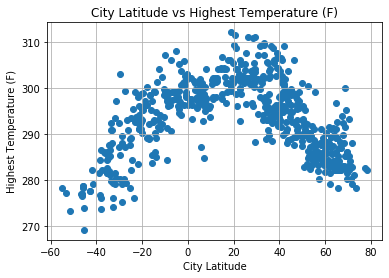

In [41]:
latitude = ws_pd_c.Latitude
max_temperature = ws_pd_c.Max_Temp
plt.scatter(latitude, max_temperature)
plt.xlabel("City Latitude")
plt.ylabel("Highest Temperature (F)")
plt.grid()
plt.title('City Latitude vs Highest Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

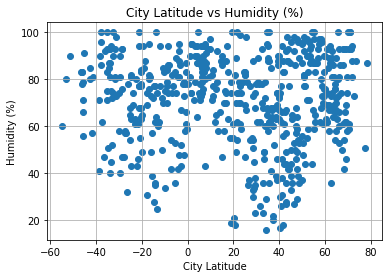

In [42]:
humidity = ws_pd_c.Humidity
plt.scatter(latitude, humidity)
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title('City Latitude vs Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

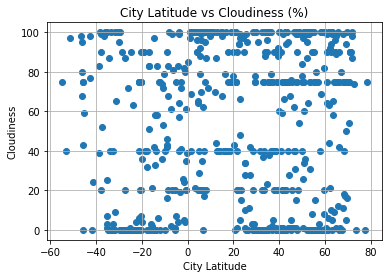

In [43]:
cloudiness = ws_pd_c.Cloudiness
plt.scatter(latitude, cloudiness)
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title('City Latitude vs Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

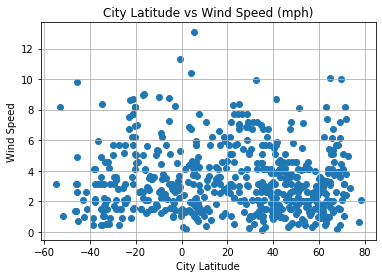

In [44]:
wind_speed = ws_pd_c.Wind_Speed
plt.scatter(latitude, wind_speed)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.title('City Latitude vs Wind Speed (mph)')
plt.show()

## Linear Regression

In [45]:
# OPTIONAL: Create a function to create Linear Regression plots

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Rikitea,-23.12,-134.97,292.54,63,0,7.55,PF,1595534596
1,Bluff,-46.60,168.33,277.04,83,98,1.34,NZ,1595534626
2,Thompson,55.74,-97.86,299.15,65,75,4.10,CA,1595534424
3,Kenai,60.55,-151.26,290.15,63,1,2.60,US,1595534805
4,Bredasdorp,-34.53,20.04,285.15,93,0,1.00,ZA,1595534616
...,...,...,...,...,...,...,...,...,...
578,Kendari,-3.94,122.50,294.68,92,40,1.56,ID,1595535403
579,Gisborne,-38.65,178.00,281.48,71,39,0.89,NZ,1595535403
580,Wenling,28.37,121.36,303.15,51,100,1.83,CN,1595534825
581,Auki,-8.77,160.70,298.73,86,68,2.24,SB,1595535020


In [48]:
# Create Northern and Southern Hemisphere DataFrames
nh = ws_pd_c.loc[ws_pd_c['Latitude']>0]
sh = ws_pd_c.loc[ws_pd_c['Latitude']<0]
print(f"Northern Hemisphere Cities: {len(nh)}; Southern Hemisphere Cities: {len(sh)}.")

Northern Hemisphere Cities: 405; Southern Hemisphere Cities: 175.


In [ ]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4661940292270317


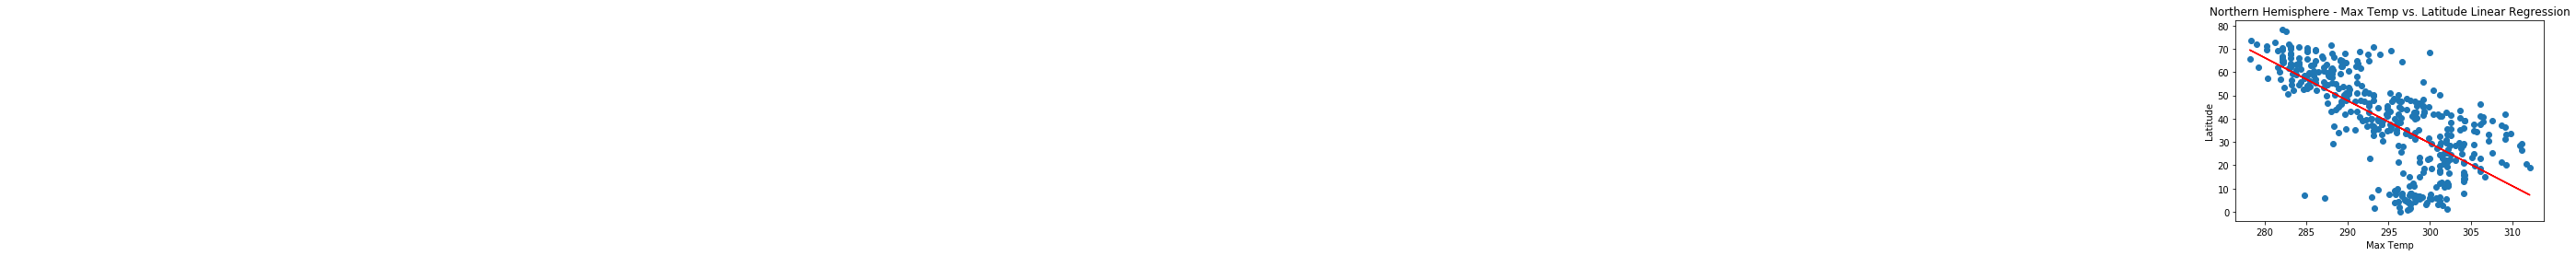

In [96]:
x_values = nh['Max_Temp']
y_values = nh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6526006828004065


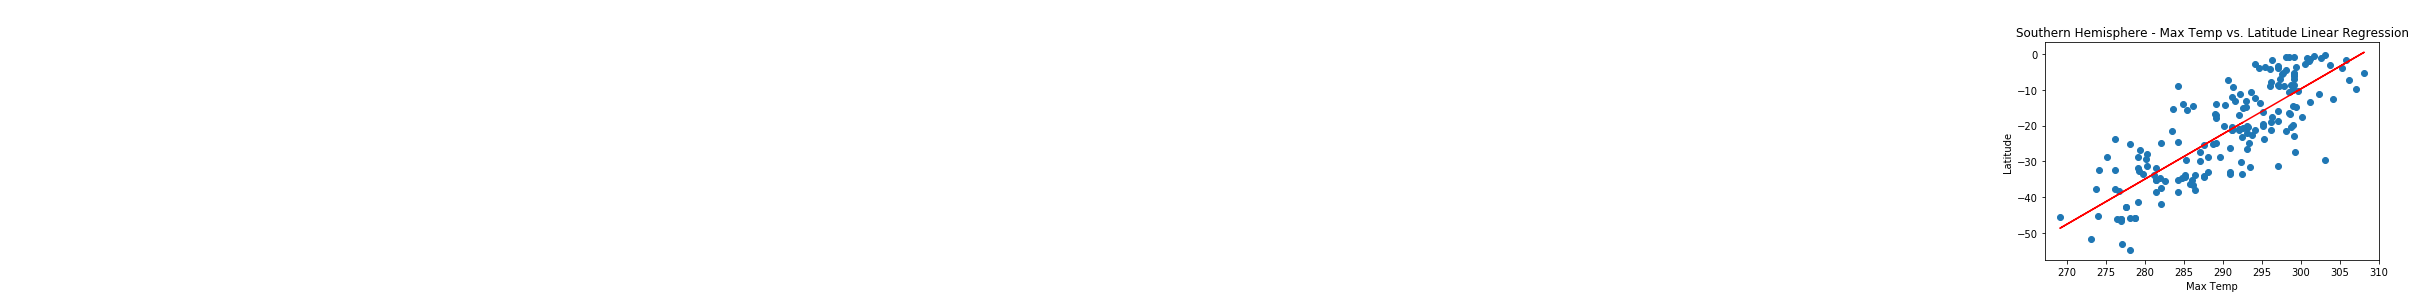

In [70]:
x_values = sh['Max_Temp']
y_values = sh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0011159362754352136


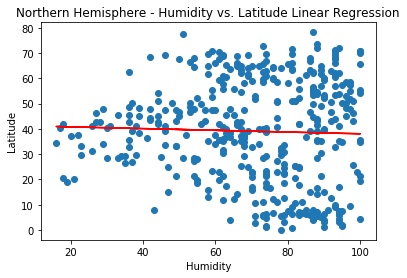

In [97]:
x_values = nh['Humidity']
y_values = nh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02138610469739571


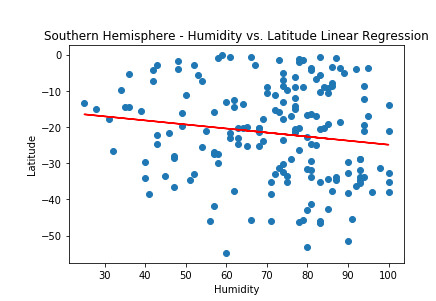

In [98]:
x_values = sh['Humidity']
y_values = sh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008501003903957109


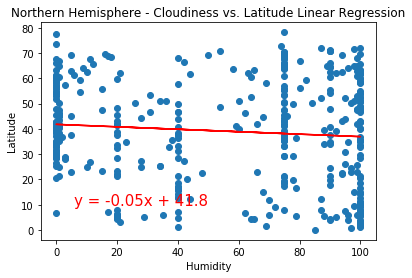

In [99]:
x_values = nh['Cloudiness']
y_values = nh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0026159055286641615


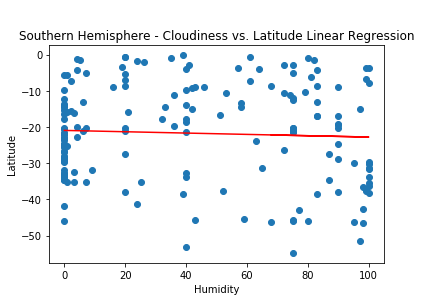

In [100]:
x_values = sh['Cloudiness']
y_values = sh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005374869799489054


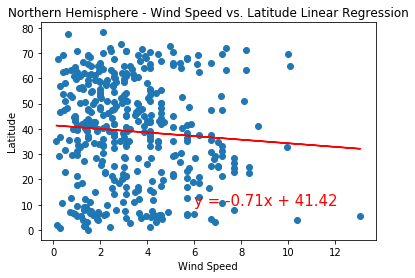

In [102]:
x_values = nh['Wind_Speed']
y_values = nh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01619772005850082


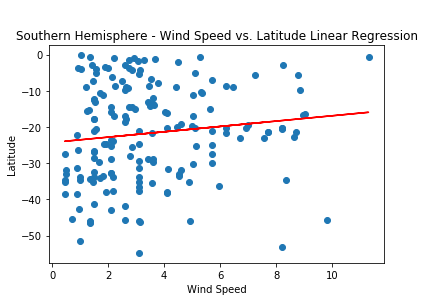

In [103]:
x_values = sh['Wind_Speed']
y_values = sh['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()